## 1. Токенизация

Токенизировать — значит, поделить текст на слова, или *токены*. Самый наивный способ токенизировать текст — разделить на слова по пробелам с помощью `split`. Но `split` упускает очень много всего, например, не отделяет пунктуацию от слов. Кроме этого есть ещё много менее тривиальных проблем, поэтому на практике всегда используют готовые токенизаторы.

In [1]:
!pip install nltk

You should consider upgrading via the 'C:\Users\tg082\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
import warnings

import nltk
import pandas as pd
from nltk.tokenize import word_tokenize

warnings.filterwarnings("ignore")

In [ ]:
nltk.download("punkt_tab", quiet=True)

True

In [ ]:
example = "Сентябрь - это начало учебного года:("

In [ ]:
# c помощью split()
example.split()

['Сентябрь', '-', 'это', 'начало', 'учебного', 'года:(']

In [ ]:
# c помощью токенизатора
word_tokenize(example)

['Сентябрь', '-', 'это', 'начало', 'учебного', 'года', ':', '(']

В `nltk` есть довольно много различных токенизаторов.

Функция `dir(object)` возвращает список допустимых атрибутов объекта


In [ ]:
from nltk import tokenize

dir(tokenize)


['BlanklineTokenizer',
 'LegalitySyllableTokenizer',
 'LineTokenizer',
 'MWETokenizer',
 'NLTKWordTokenizer',
 'PunktSentenceTokenizer',
 'PunktTokenizer',
 'RegexpTokenizer',
 'ReppTokenizer',
 'SExprTokenizer',
 'SpaceTokenizer',
 'StanfordSegmenter',
 'SyllableTokenizer',
 'TabTokenizer',
 'TextTilingTokenizer',
 'ToktokTokenizer',
 'TreebankWordDetokenizer',
 'TreebankWordTokenizer',
 'TweetTokenizer',
 'WhitespaceTokenizer',
 'WordPunctTokenizer',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_get_punkt_tokenizer',
 '_treebank_word_tokenizer',
 'api',
 'blankline_tokenize',
 'casual',
 'casual_tokenize',
 'destructive',
 'functools',
 'legality_principle',
 'line_tokenize',
 'load',
 'mwe',
 'punkt',
 're',
 'regexp',
 'regexp_span_tokenize',
 'regexp_tokenize',
 'repp',
 'sent_tokenize',
 'sexpr',
 'sexpr_tokenize',
 'simple',
 'sonority_sequencing',
 'stanford_segmenter',
 'string_span_tokenize',


Можно получить индексы начала и конца каждого токена.

С помощью nltk.tokenizer.WhitespaceTokenizer() мы можем извлекать токены из строки слов или предложений без пробелов, новой строки и табуляции. Для идентификации токенов с использованием целочисленных смещений `(start_i, end_i)`, где `s[start_i:end_i]` - соответствующий токен, используем `span_tokenize(s)`.

In [ ]:
wh_tok = tokenize.WhitespaceTokenizer()
list(wh_tok.span_tokenize(example))

[(0, 8), (9, 10), (11, 14), (15, 21), (22, 30), (31, 37)]

Некторые токенизаторы ведут себя специфично:

Токенизатор `Treebank` использует регулярные выражения для токенизации текста.

Этот токенизатор выполняет следующие шаги:

* разделяет стандартные сокращения, например `don't -> do n't` и `they'll->they 'll`

* обрабатывает большинство знаков препинания как отдельные токены

* разделяет запятые и одинарные кавычки, если за ними следует пробел

* отделяет точки, которые появляются в конце строки.

In [ ]:
tokenize.TreebankWordTokenizer().tokenize("They'll save and invest more.")

['They', "'ll", 'save', 'and', 'invest', 'more', '.']

In [ ]:
tokenize.TreebankWordTokenizer().tokenize('''Good muffins cost $3.88\nin New York.  Please buy me\ntwo of them.\nThanks.''')

['Good',
 'muffins',
 'cost',
 '$',
 '3.88',
 'in',
 'New',
 'York.',
 'Please',
 'buy',
 'me',
 'two',
 'of',
 'them.',
 'Thanks',
 '.']

Для некоторых задач это может быть полезно.

А некоторые предназначены вообще не для текста на естественном языке.

Токенизатор S-выражения `SExprTokenizer` используется для поиска выражений в скобках в строке. В частности, он делит строку на последовательность подстрок, которые являются либо выражениями в скобках (включая любые вложенные выражения в скобках), либо другими токенами, разделенными пробелами.

In [ ]:
tokenize.SExprTokenizer().tokenize("(a (b c)) d e (f)")

['(a (b c))', 'd', 'e', '(f)']

Есть токенизатор, который может быть полезен для работы с твитами или сообщениями из соц. сетей. Он сохранит смайлики, хештеги и т.п.

In [ ]:
from nltk.tokenize import TweetTokenizer

tw = TweetTokenizer()
tw.tokenize(example)

['Сентябрь', '-', 'это', 'начало', 'учебного', 'года', ':(']

## 2. Стоп-слова и пунктуация

*Стоп-слова* — это слова, которые часто встречаются практически в любом тексте и ничего интересного не говорят о конретном документе, то есть играют роль шума. Поэтому их принято убирать. По той же причине убирают и пунктуацию.

Стоп-слово — обычно это служебная часть речи, которая употребляется так часто, что отдельное её употребление не вносит в текст какой-то отдельный особенный смысл.

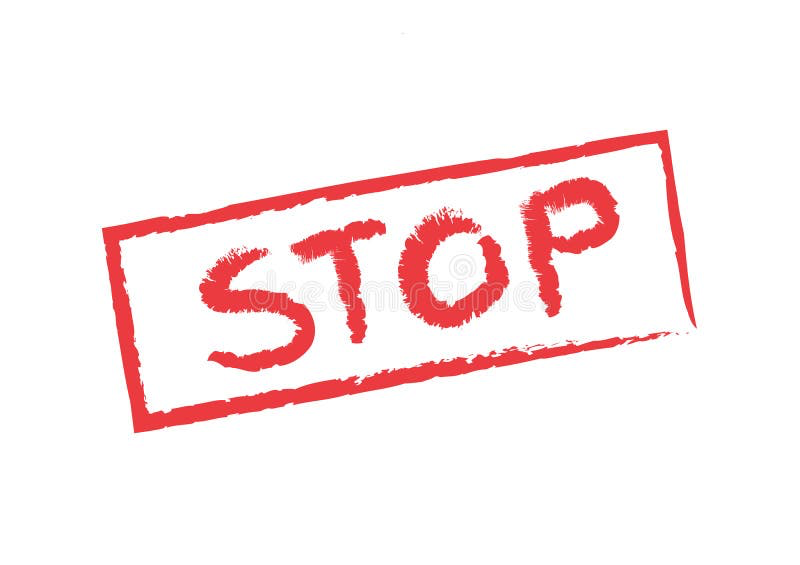

In [ ]:
nltk.download("stopwords", quiet=True)

True

In [ ]:
from nltk.corpus import stopwords

print(stopwords.words("russian"))

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

In [ ]:
print(stopwords.words("english"))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [ ]:
from string import punctuation

punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
noise = stopwords.words("russian") + list(punctuation)

## 3. Лемматизация и стемминг
### 3.1 Лемматизация

[**Лемматизация**](https://en.wikipedia.org/wiki/Lemmatisation) — процесс приведения слова к его нормальной форме (**лемме**):
- для существительных — именительный падеж, единственное число;
- для прилагательных — именительный падеж, единственное число, мужской род;
- для глаголов, причастий, деепричастий — глагол в инфинитиве.

Например, токены «пью», «пил», «пьет» перейдут в «пить». Почему это хорошо?
* Во-первых, мы хотим рассматривать как отдельный признак каждое *слово*, а не каждую его отдельную форму.
* Во-вторых, некоторые стоп-слова стоят только в начальной форме, и без лемматизации выкидываем мы только её.

Для русского есть два хороших лемматизатора: `mystem` и `pymorphy`.

#### [Mystem](https://tech.yandex.ru/mystem/)

Mystem — это пример популярной библиотеки для лемматизации. Как с ним работать:
* скачать mystem и запускать [из терминала с разными параметрами](https://tech.yandex.ru/mystem/doc/)
* использовать обёртку для python [pymystem3](https://pythonhosted.org/pymystem3/pymystem3.html) (она медленнее, но удобнее в использовании)

In [ ]:
!pip install pymystem3

In [ ]:
from pymystem3 import Mystem

mystem_analyzer = Mystem()

Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


Мы инициализировали Mystem c дефолтными параметрами. А вообще параметры есть такие:
* mystem_bin — путь к `mystem`, если их несколько
* grammar_info — нужна ли грамматическая информация или только леммы (по умолчанию нужна)
* disambiguation — нужно ли снятие [омонимии](https://ru.wikipedia.org/wiki/%D0%9E%D0%BC%D0%BE%D0%BD%D0%B8%D0%BC%D1%8B) - дизамбигуация (по умолчанию нужна)
* entire_input — нужно ли сохранять в выводе все (пробелы, например), или можно выкинуть (по умолчанию оставляется все)

Методы Mystem принимают строку, токенизатор вшит внутри. Можно и пословно анализировать, но тогда он не сможет учитывать контекст.

Можно просто лемматизировать текст:

In [ ]:
example

'Сентябрь - это начало учебного года:('

In [ ]:
print(mystem_analyzer.lemmatize(example))

['сентябрь', ' - ', 'это', ' ', 'начало', ' ', 'учебный', ' ', 'год', ':(\n']


### [Pymorphy](http://pymorphy2.readthedocs.io/en/latest/)
Это модуль на python, довольно быстрый и с большим количеством функций.

In [ ]:
!pip install pymorphy3

In [ ]:
from pymorphy3 import MorphAnalyzer

In [ ]:
pymorphy3_analyzer = MorphAnalyzer()

`pymorphy3` работает с отдельными словами. Если дать ему на вход предложение, то он его просто не лемматизирует, т.к. не понимает.

Метод `MorphAnalyzer.parse()` принимает слово и возвращает все возможные его разборы.

У каждого разбора есть тег. Тег — это набор граммем, характеризующих данное слово. Например, тег `VERB,perf,intr plur,past,indc` означает, что слово — глагол (`VERB`) совершенного вида (`perf`), непереходный (`intr`), множественного числа (`plur`), прошедшего времени (`past`), изъявительного наклонения (`indc`).


In [ ]:
analizer = pymorphy3_analyzer.parse("сорока")
analizer

[Parse(word='сорока', tag=OpencorporaTag('NUMR gent'), normal_form='сорок', score=0.68, methods_stack=((DictionaryAnalyzer(), 'сорока', 2920, 1),)),
 Parse(word='сорока', tag=OpencorporaTag('NOUN,anim,femn sing,nomn'), normal_form='сорока', score=0.08, methods_stack=((DictionaryAnalyzer(), 'сорока', 421, 0),)),
 Parse(word='сорока', tag=OpencorporaTag('NUMR ablt'), normal_form='сорок', score=0.08, methods_stack=((DictionaryAnalyzer(), 'сорока', 2920, 4),)),
 Parse(word='сорока', tag=OpencorporaTag('NUMR loct'), normal_form='сорок', score=0.08, methods_stack=((DictionaryAnalyzer(), 'сорока', 2920, 5),)),
 Parse(word='сорока', tag=OpencorporaTag('NOUN,inan,femn sing,nomn'), normal_form='сорока', score=0.04, methods_stack=((DictionaryAnalyzer(), 'сорока', 44, 0),)),
 Parse(word='сорока', tag=OpencorporaTag('NUMR datv'), normal_form='сорок', score=0.04, methods_stack=((DictionaryAnalyzer(), 'сорока', 2920, 2),))]

In [ ]:
analizer[0].normal_form

'сорок'

### mystem vs. pymorphy

1) `mystem` работает невероятно медленно под `windows` на больших текстах

2) *Снятие омонимии*. `Mystem` умеет снимать омонимию по контексту (хотя не всегда преуспевает), `pymorphy2` берет на вход одно слово и, соответственно, вообще не умеет дизамбигуировать по контексту.

In [ ]:
homonym1 = "За время обучения я прослушал больше сорока курсов."
homonym2 = "Сорока своровала блестящее украшение со стола."

# корректно определил части речи
# NUM — числительное
# S — существительное
print(mystem_analyzer.analyze(homonym1)[-5])
print(mystem_analyzer.analyze(homonym2)[0])

{'analysis': [{'lex': 'сорок', 'wt': 0.8710292664, 'gr': 'NUM=(пр|дат|род|твор)'}], 'text': 'сорока'}
{'analysis': [{'lex': 'сорока', 'wt': 0.1210970041, 'gr': 'S,жен,од=им,ед'}], 'text': 'Сорока'}


### 3.2 Стемминг

В отличие от лемматизации, при применении стемминга у всех слов отбрасываются аффиксы (окончания и суффиксы), что необязательно приводит слова к формам, существующим в рассматриваемом языке. [**Snowball**](http://snowball.tartarus.org/) — фрэймворк для написания алгоритмов стемминга. Алгоритмы стемминга отличаются для разных языков и используют знания о конкретном языке: списки окончаний для разных частей речи, разных склонений и т.д.

In [ ]:
from nltk.stem.snowball import SnowballStemmer

In [ ]:
tokenized_example = word_tokenize(example)

In [ ]:
stemmer = SnowballStemmer("russian")

stemmed_example = [stemmer.stem(w) for w in tokenized_example]

print(" ".join(stemmed_example))

сентябр - эт нача учебн год : (


Для английского получится что-то такое.

In [ ]:
text = 'In my younger and more vulnerable years my father gave me some advice that I\'ve been turning over in my mind ever since.\n"Whenever you feel like criticizing any one," he told me, "just remember that all the people in this world haven\'t had the advantages that you\'ve had."'
print(text)
text_tokenized = [w for w in word_tokenize(text) if w.isalpha()]
print("==========")
print(text_tokenized)

In my younger and more vulnerable years my father gave me some advice that I've been turning over in my mind ever since.
"Whenever you feel like criticizing any one," he told me, "just remember that all the people in this world haven't had the advantages that you've had."
['In', 'my', 'younger', 'and', 'more', 'vulnerable', 'years', 'my', 'father', 'gave', 'me', 'some', 'advice', 'that', 'I', 'been', 'turning', 'over', 'in', 'my', 'mind', 'ever', 'since', 'Whenever', 'you', 'feel', 'like', 'criticizing', 'any', 'one', 'he', 'told', 'me', 'just', 'remember', 'that', 'all', 'the', 'people', 'in', 'this', 'world', 'have', 'had', 'the', 'advantages', 'that', 'you', 'had']


In [ ]:
stemmer = SnowballStemmer("english")

text_stemmed = [stemmer.stem(w) for w in text_tokenized]

print(" ".join(text_stemmed))

in my younger and more vulner year my father gave me some advic that i been turn over in my mind ever sinc whenev you feel like critic ani one he told me just rememb that all the peopl in this world have had the advantag that you had


## 4. Bag-of-words и TF-IDF

Но как же все-таки работать с текстами, используя стандартные методы машинного обучения? Ведь нам нужны объекты выборки, которые описываются числами, а не словами. Иначе говоря, нам нужно *векторизовать* текстовые данные.

### 4.1 Bag-of-words

Пусть у нас имеется коллекция текстов $D = \{d_i\}_{i=1}^l$ и словарь всех слов, встречающихся в выборке $V = \{v_j\}_{j=1}^d.$ В этом случае некоторый текст $d_i$ описывается вектором $(x_{ij})_{j=1}^d,$ где
$$x_{ij} = \sum_{v \in d_i} [v = v_j].$$

Таким образом, текст $d_i$ описывается вектором количества вхождений каждого слова из словаря в данный текст.

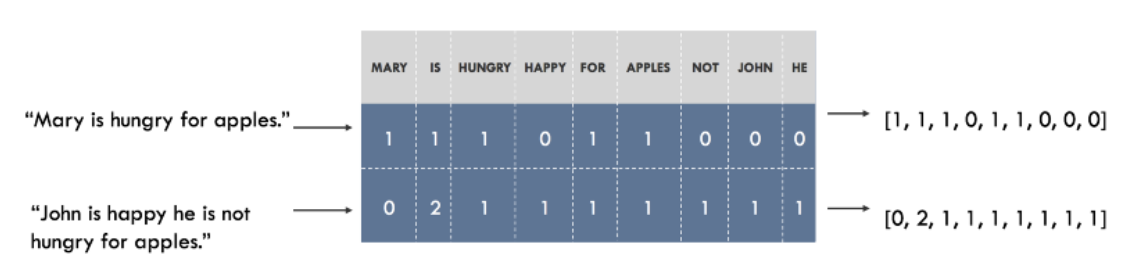

In [ ]:
texts = [
    "I like my cat.",
    "My cat is the most perfect cat.",
    "is this cat or is this bread?",
]

In [ ]:
w = 'like'

w.isalpha() # Метод isalpha()возвращает True, если все символы являются буквами алфавита (az)

True

In [ ]:
texts_tokenized = [
    " ".join([w for w in word_tokenize(t) if w.isalpha()]) for t in texts
]
texts_tokenized

['I like my cat',
 'My cat is the most perfect cat',
 'is this cat or is this bread']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cnt_vec = CountVectorizer(stop_words='english')

X = cnt_vec.fit_transform(texts_tokenized)

In [ ]:
x = cnt_vec.vocabulary_

res = dict(sorted(x.items(), key=lambda item: item[1]))

res.keys()

dict_keys(['bread', 'cat', 'like', 'perfect'])

Вопрос для желающих покопаться в деталях: куда делся токен `I`?

Посмотрим, какие признаки сформировал CountVectorizer.

In [ ]:
X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 6 stored elements and shape (3, 4)>

In [ ]:
X.toarray()

array([[0, 1, 1, 0],
       [0, 2, 0, 1],
       [1, 1, 0, 0]])

In [ ]:
texts_tokenized

['I like my cat',
 'My cat is the most perfect cat',
 'is this cat or is this bread']

In [ ]:
pd.DataFrame(X.toarray(), columns=res.keys())

,bread,cat,like,perfect
0,0,1,1,0
1,0,2,0,1
2,1,1,0,0


### 4.2 TF-IDF

Заметим, что если слово часто встречается в одном тексте, но почти не встречается в других, то оно получает для данного текста большой вес, ровно так же, как и слова, которые часто встречаются в каждом тексте. Для того чтобы разделять такие слова, можно использовать статистическую меру TF-IDF, характеризующую важность слова для конкретного текста. Для каждого слова из текста $d$ рассчитаем относительную частоту встречаемости в нем (Term Frequency):
$$
\text{TF}(t, d) = \frac{C(t | d)}{\sum\limits_{k \in d}C(k | d)},
$$
где $C(t | d)$ - число вхождений слова $t$ в текст $d$.

Также для каждого слова из текста $d$ рассчитаем обратную частоту встречаемости в корпусе текстов $D$ (Inverse Document Frequency):
$$
\text{IDF}(t, D) = \log\left(\frac{|D|}{|\{d_i \in D \mid t \in d_i\}|}\right)
$$
Логарифмирование здесь проводится с целью уменьшить масштаб весов, ибо зачастую в корпусах присутствует очень много текстов.

В итоге каждому слову $t$ из текста $d$ теперь можно присвоить вес
$$
\text{TF-IDF}(t, d, D) = \text{TF}(t, d) \times \text{IDF}(t, D)
$$
Интерпретировать формулу выше несложно: действительно, чем чаще данное слово встречается в данном тексте и чем реже в остальных, тем важнее оно для этого текста.

Отметим, что в качестве TF и IDF можно использовать другие [определения](https://en.wikipedia.org/wiki/Tf%E2%80%93idf#Definition).

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer(stop_words='english')
X = tfidf_vec.fit_transform(texts_tokenized)

Наши векторы и словарь будут выглядеть так:

In [ ]:
tfidf_vec.vocabulary_.keys()

dict_keys(['like', 'cat', 'perfect', 'bread'])

In [ ]:
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 6 stored elements and shape (3, 4)>

In [ ]:
X.toarray()

array([[0.        , 0.50854232, 0.861037  , 0.        ],
       [0.        , 0.76322829, 0.        , 0.64612892],
       [0.861037  , 0.50854232, 0.        , 0.        ]])

In [ ]:
pd.DataFrame(X.toarray(), columns=res.keys())

,bread,cat,like,perfect
0,0.000000,0.508542,0.861037,0.000000
1,0.000000,0.763228,0.000000,0.646129
2,0.861037,0.508542,0.000000,0.000000


**Вопрос:** что изменилось по сравнению с использованием метода `CountVectorizer`?

## 5. Решение задачи с текстовыми данными

Будем решать задачу классификации твитов по тональности. Возьмём датасет из твитов, в котором про каждый твит известно, как он эмоционально окрашен: положительно или отрицательно. Задача: предсказывать эмоциональную окраску. Классификацию по тональности используют, например, в рекомендательных системах, чтобы понять, понравилось ли людям кафе, кино и т.д.

Скачиваем куски датасета ([источник](http://study.mokoron.com/)): [положительные](https://www.dropbox.com/s/fnpq3z4bcnoktiv/positive.csv?dl=0), [отрицательные](https://www.dropbox.com/s/r6u59ljhhjdg6j0/negative.csv).

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler

In [ ]:
# считываем данные и заполняем общий датасет
positive = pd.read_csv("https://raw.githubusercontent.com/Murcha1990/Raiffaizen_ML_summer2023/main/Datasets/positive_tweets.csv")
negative = pd.read_csv("https://raw.githubusercontent.com/Murcha1990/Raiffaizen_ML_summer2023/main/Datasets/negative_tweets.csv")
df = pd.concat([positive, negative])

In [ ]:
df.head()

,text,label
0,"@first_timee хоть я и школота, но поверь, у на...",positive
1,"Да, все-таки он немного похож на него. Но мой ...",positive
2,RT @KatiaCheh: Ну ты идиотка) я испугалась за ...,positive
3,"RT @digger2912: ""Кто то в углу сидит и погибае...",positive
4,@irina_dyshkant Вот что значит страшилка :D\nН...,positive


In [ ]:
df.shape

(226834, 2)

In [ ]:
df['label'].value_counts(normalize = True)

,proportion
label,
positive,0.506586
negative,0.493414


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.text, df.label, test_size = 0.2, random_state=12345)

### 5.1 Обучение моделей

Давайте обучим наш первый бейзлайн — логистическую регрессию!

In [ ]:
x_train.head()

,text
105483,как же я хочу спать после работыы.... но радуе...
31585,"@kimvradica в общем, даю тебе картбланш) созда..."
11394,RT @NariyanaGrig: ЗАБЫЛА ЗАГАДАТЬ ЖЕЛАНИЕ!!!!!...
24617,RT @AntipinaMarina: @Horanso_on ты мне не пише...
66411,Я оооочень скучаю(( http://t.co/r3SzitnWwM


In [ ]:
vec = CountVectorizer(ngram_range=(1, 1))

bow_train = vec.fit_transform(x_train)  # bow — bag of words (мешок слов)
bow_test = vec.transform(x_test)

scaler = MaxAbsScaler()
bow_train = scaler.fit_transform(bow_train)
bow_test = scaler.transform(bow_test)

clf = LogisticRegression(max_iter=200, random_state=42)
clf.fit(bow_train, y_train)
pred = clf.predict(bow_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

    negative       0.76      0.77      0.77     22433
    positive       0.78      0.77      0.77     22934

    accuracy                           0.77     45367
   macro avg       0.77      0.77      0.77     45367
weighted avg       0.77      0.77      0.77     45367



In [ ]:
bow_train.shape
# первая размерность - количество документов
# вторая размерность - количесто слов в словаре

(181467, 254418)

А теперь повторим процедуру для TF-IDF.

In [ ]:
vec = TfidfVectorizer(ngram_range=(1, 1))
vec_train = vec.fit_transform(x_train)
vec_test = vec.transform(x_test)

scaler = MaxAbsScaler()
vec_train = scaler.fit_transform(vec_train)
vec_test = scaler.transform(vec_test)

clf = LogisticRegression(max_iter=300, random_state=42)
clf.fit(vec_train, y_train)
pred_tfidf = clf.predict(vec_test)
print(classification_report(y_test, pred_tfidf))

              precision    recall  f1-score   support

    negative       0.77      0.76      0.77     22433
    positive       0.77      0.78      0.77     22934

    accuracy                           0.77     45367
   macro avg       0.77      0.77      0.77     45367
weighted avg       0.77      0.77      0.77     45367



### 5.2 О важности эксплоративного анализа

Но иногда пунктуация бывает и не шумом. Главное — отталкиваться от задачи. Что будет если вообще не убирать пунктуацию?

In [ ]:
vec = CountVectorizer(ngram_range=(1, 1), tokenizer=word_tokenize, min_df=5)
bow_train = vec.fit_transform(x_train)
bow_test = vec.transform(x_test)

scaler = MaxAbsScaler()
bow_train = scaler.fit_transform(bow_train)
bow_test = scaler.transform(bow_test)

clf = LogisticRegression(max_iter=200, random_state=42)
clf.fit(bow_train, y_train)
pred = clf.predict(bow_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

    negative       0.96      0.98      0.97     22433
    positive       0.98      0.97      0.97     22934

    accuracy                           0.97     45367
   macro avg       0.97      0.97      0.97     45367
weighted avg       0.97      0.97      0.97     45367



Стоило оставить пунктуацию, и внезапно все метрики устремились к 1. Как это получилось? Среди неё были очень значимые токены (как вы думаете, какие?). Найдём признак с самыми большим коэффициентом:

In [ ]:
reverse_vocab = {value: key for key, value in vec.vocabulary_.items()}
reverse_vocab[np.argmax(clf.coef_)]

')'

Посмотрим, как один из супер-значительных токенов справится с классификацией безо всякого машинного обучения:

In [ ]:
cool_token = ')'

pred = ["positive" if cool_token in tweet else "negative" for tweet in x_test]
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

    negative       0.85      1.00      0.92     22433
    positive       1.00      0.83      0.91     22934

    accuracy                           0.91     45367
   macro avg       0.93      0.91      0.91     45367
weighted avg       0.93      0.91      0.91     45367



In [ ]:
cool_token = reverse_vocab[np.argmax(clf.coef_)]

tweets_with_cool_token = [tweet for tweet in x_train if cool_token in tweet]
np.random.seed(12345)
for tweet in np.random.choice(tweets_with_cool_token, size=10, replace=False):
    print(tweet)

RT @LesyaRyabova: такие милые:)умнички:)ещё раз,Саш:)
RT @Alexandervolf: @kopteva1709 @nessi44 Это по нашему) http://t.co/wYMJnUEAfs
@sobaka__ Славно как! Эта прекрасная новость делает день еще краше. Берегите их, берегите себя и свою душу, мой друг )))
@sacreddarling о ура) ого,в супермаркетах тоже бывает фалафель? замороженный?
Люблю грозу в начале лета,как долбанёт и ты котлета) #FOLLOW
@lentaruofficial поюзайте последнюю Люмию.. Вас ждет много удивительных открытий..)
Angry Birds Go - уже доступна) http://t.co/qUYHvLICNk
RT @Holmru2: @arina_jo_leto ну да)) я теперь жизнерадостный человек))
Вечерняя погоня) @ Дом милый дом http://t.co/IBDOPpoH36
@OChuluunbileg @econsarnai Нэг ийм #бодол байх! Монголд АН,МАН гэсэн үндэсний хэмжээний 2-хон хүчирхэг компани бий! Бусад нь жижиг ХЭАА :-)


### 5.3 Символьные n-граммы

Теперь в качестве признаков используем, например, биграммы символов:

In [ ]:
bow_train.shape

(181467, 31393)

In [ ]:
vec = CountVectorizer(ngram_range=(2, 2), analyzer="char")
bow_train = vec.fit_transform(x_train)
bow_test = vec.transform(x_test)

scaler = MaxAbsScaler()
bow_train = scaler.fit_transform(bow_train)
bow_test = scaler.transform(bow_test)

clf = LogisticRegression(max_iter=200, random_state=42)
clf.fit(bow_train, y_train)
pred = clf.predict(bow_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

    negative       1.00      1.00      1.00     22433
    positive       1.00      1.00      1.00     22934

    accuracy                           1.00     45367
   macro avg       1.00      1.00      1.00     45367
weighted avg       1.00      1.00      1.00     45367



В общем-то, теперь уже понятно, почему на этих данных здесь `accuracy = 1.0` . Так или иначе, на символах классифицировать тоже можно: для некоторых задач (например, для определения языка) признаки-символьные n-граммы могут внести серьезный вклад в качество модели. Ещё одна замечательная особенность признаков-символов: токенизация и лемматизация не нужна, можно использовать такой подход для языков, у которых нет готовых анализаторов.